In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2


In [ ]:
from google.colab.patches import cv2_imshow

<IPython.core.display.Javascript object>

Saved to photo.jpg


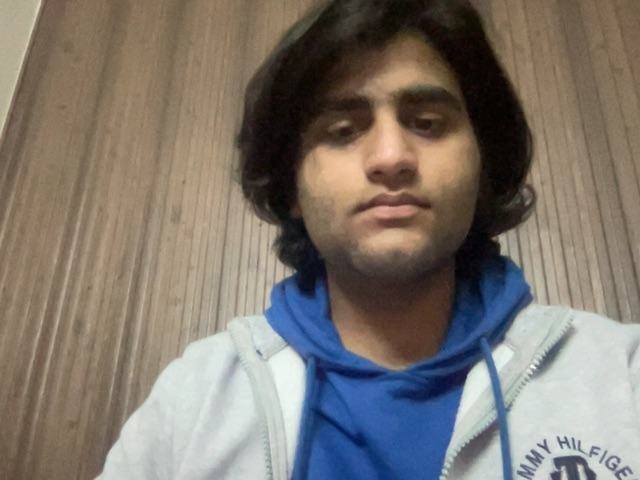

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.8):
 js = Javascript('''
async function takePhoto(quality) {
const div = document.createElement('div');
const capture = document.createElement('button');
capture.textContent = 'Capture';
div.appendChild(capture);
const video = document.createElement('video');
video.style.display = 'block';
const stream = await navigator.mediaDevices.getUserMedia({video: true});
document.body.appendChild(div);
div.appendChild(video);
video.srcObject = stream;
await video.play();
// Resize the output to fit the video element.
google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
// Wait for Capture to be clicked.
await new Promise((resolve) => capture.onclick = resolve);
const canvas = document.createElement('canvas');
canvas.width = video.videoWidth;
canvas.height = video.videoHeight;
canvas.getContext('2d').drawImage(video, 0, 0);
stream.getVideoTracks()[0].stop();
div.remove();
return canvas.toDataURL('image/jpeg', quality);
}
''')
 display(js)
 data = eval_js('takePhoto({})'.format(quality))
 binary = b64decode(data.split(',')[1])
 with open(filename, 'wb') as f:
  f.write(binary)
 return filename
from IPython.display import Image
filename = take_photo()
print('Saved to {}'.format(filename))
# Show the image which was just taken.
display(Image(filename))
# Errors will be thrown if the user does not have a webcam or if they do not
# grant the page permission to access it.


In [ ]:
import cv2
img = cv2.imread('photo.jpg')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_nose.xml')
# detect all the faces in the image
faces = face_cascade.detectMultiScale(gray_img,1.1,4)
# print the number of faces detected
print(f"{len(faces)} faces detected in the image.")

1 faces detected in the image.


In [ ]:
for x, y, width, height in faces:
 cv2.rectangle(img, (x, y), (x + width, y + height), color=(0, 255, 0), thickness=3)

In [ ]:
# save the image with rectangles
cv2.imwrite("photo_detected.jpg", img)

True